In [14]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

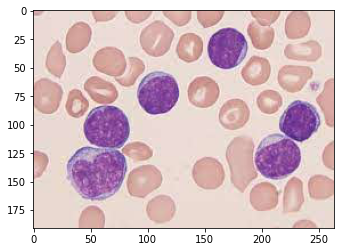

In [16]:
cvimg = cv2.imread('dataset/train/img-1.jpg')
rgbimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2RGB)
plt.imshow(rgbimg)

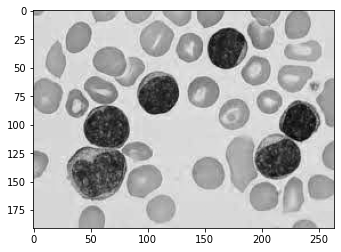

In [17]:
greenimg = cvimg[:,:,1].astype('float64')
greenimg *= (255.0/greenimg.max())
greenimg = greenimg.astype('uint8')
plt.imshow(greenimg, 'gray')

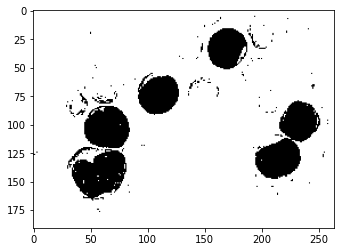

In [18]:
adabingreenimg = cv2.adaptiveThreshold(greenimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 535, 62)
plt.imshow(adabingreenimg, 'gray')

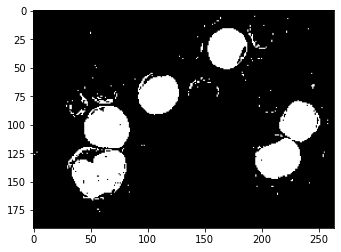

In [19]:
invadabingreenimg = 255-adabingreenimg
plt.imshow(invadabingreenimg, 'gray')

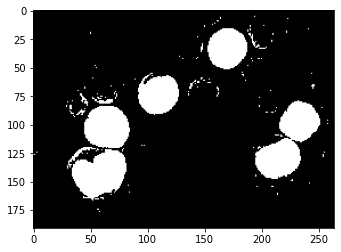

In [20]:
img, contours, hierarchy = cv2.findContours(invadabingreenimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    cv2.fillPoly(invadabingreenimg, pts=[contour], color=255)
plt.imshow(invadabingreenimg, 'gray')

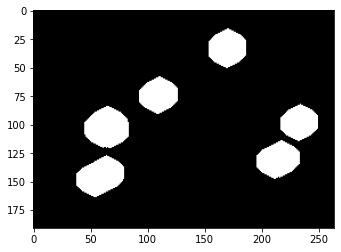

In [21]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
oinvadabingreenimg = cv2.morphologyEx(invadabingreenimg,cv2.MORPH_OPEN,kernel, iterations = 5)
plt.imshow(oinvadabingreenimg, 'gray')

In [22]:
_, whitecellscontours, _ = cv2.findContours(oinvadabingreenimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(whitecellscontours))

6


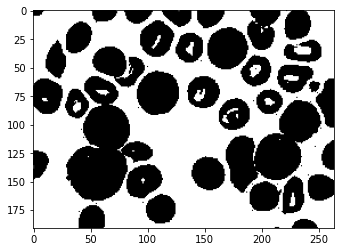

In [23]:
adabingreenimg = cv2.adaptiveThreshold(greenimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 535, 0)
plt.imshow(adabingreenimg, 'gray')

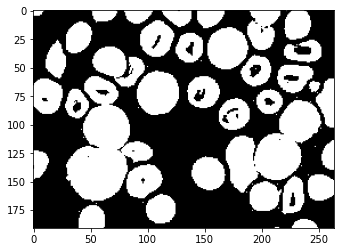

In [24]:
invadabingreenimg = 255 - adabingreenimg
plt.imshow(invadabingreenimg, 'gray')

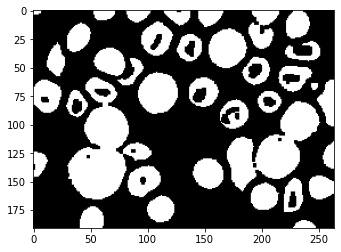

In [26]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
einvadabingreenimg = cv2.morphologyEx(invadabingreenimg,cv2.MORPH_ERODE,kernel, iterations = 1)
plt.imshow(einvadabingreenimg, 'gray')

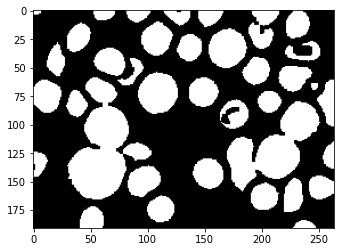

In [27]:
img, contours, hierarchy = cv2.findContours(einvadabingreenimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    cv2.fillPoly(einvadabingreenimg, pts=[contour], color=255)
plt.imshow(einvadabingreenimg, 'gray')

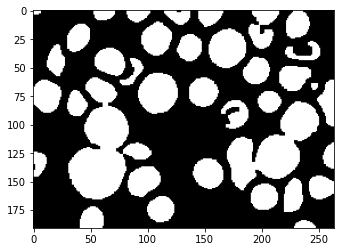

In [29]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
oeinvadabingreenimg = cv2.morphologyEx(einvadabingreenimg,cv2.MORPH_OPEN,kernel, iterations = 1)
plt.imshow(oeinvadabingreenimg, 'gray')

In [30]:
_, cellscontours, _ = cv2.findContours(oeinvadabingreenimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(cellscontours))

37
